In [ ]:
import copy
import random
from IPython.display import clear_output
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import column, row
output_notebook()

# Introduction

I am a novice in the field of Reinforcement Learning (RL). In an attempt to gain a more thorough understanding of machine learning (including RL) and brush up on Python, I found the excellent book <a href="https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646">Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow</a> by Aurélien Géron and dug in. Chapter 18 of Géron's book provides the foundation for this notebook.

# Machine Learning Categories

Common Supervised Learning Algorithms:
* k-Nearest Neighbors 
* Support Vector Machines (SVM)
* Random Forests
* Neural Networks

Common Unsupervised Learning Algorithms:
* K-Means (for clustering)
* One-class SVM and Isolation Forest (for anomaly and novelty detection)
* Principal Component Analysis (PCA) (for visualization and dimensionality reduction)

Common Reinforcement Learning Techniques:
* Policy Gradients
* <font color="red">Q-Learning and Deep Q-Learning</font>
* Markov Decision Processes

# Reinforcement Learning

Reinforcement learning is applied to a very different type of problem than supervised/unsupervised learning.
* In supervised/unsupervised learning, a model is trained to make an accurate **prediction**.
* In reinforcement learning, a model is trained to **act in an environment**.

## Framework and Terminology

* *Agent*: the learning system.
* An agent exists in an *environment*.
* The agent makes an *observation* of the environment's *state*.
* Based on the state, the agent chooses an *action*.
* Based on the action, the agent receives a *reward* - either positive for "good" actions, or negative for "bad" actions.
* The agent must then learn what the best *policy* is for the environment.

This framework can be depicted by:

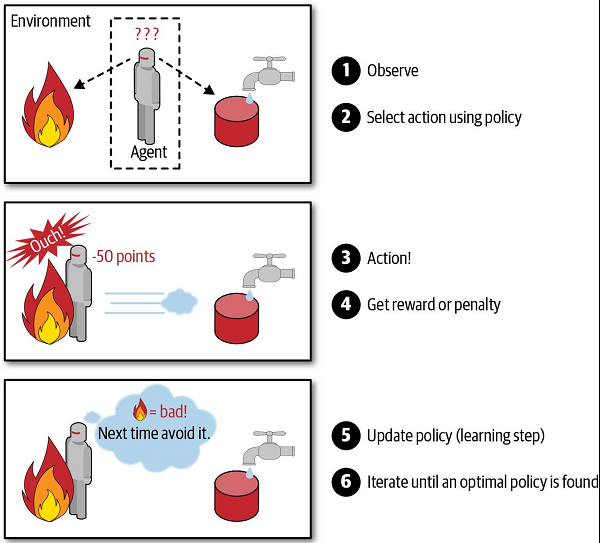

>Image from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (Aurélien Géron).

# Q-Learning

* Agent: Q-learning
* Environment: the rules and gameplay of tic-tac-toe

## State

The state is the game board, which consists of nine possible locations to play that are either empty, contain an X, or contain a O. In Python, I will represent the state as an list of length nine where 0 represents an empty space, 1 represents an X, and -1 represents an O. 

At the beginning of the game, the board is empty, so it will be represented as:

In [ ]:
state = [0 for i in range(9)]
state

[0, 0, 0, 0, 0, 0, 0, 0, 0]

## Actions

For the first player (X), there are nine possible actions. An action of 0 represents X playing in the upper left board position, an action of 1 represents the upper middle position, etc. 

If X plays action 0, and O plays action 3, the state becomes:

In [ ]:
state[0] = 1   # X plays action 0
state[3] = -1  # O plays action 3
state

[1, 0, 0, -1, 0, 0, 0, 0, 0]

This is not the way we're used to looking at a tic-tac-toe board, so I'll write a function `render()` to render the board.

In [ ]:
def render(s):
    board = ['.' for i in range(9)]
    for i in range(9):
        if s[i] == 1: board[i] = 'X'
        if s[i] == -1: board[i] = 'O'
        if s[i] == 0: board[i] = ' '
    print(board[0], "|", board[1], "|", board[2])
    print("----------")
    print(board[3], "|", board[4], "|", board[5])
    print("----------")
    print(board[6], "|", board[7], "|", board[8])
    
render(state)

X |   |  
----------
O |   |  
----------
  |   |  


## Reward System

For this example, I'll develop a game playing policy for X using the following reward system:
* X action wins the game: reward = 1 
* X action loses the game: reward = -1
* Else: reward = 0 

## Environment



In [ ]:
class ttt:
        
    def __init__(self):
        self.state = self.reset()
        
    def reset(self):
        return [0 for i in range(9)]

    def game_over(self, s):
        done = False
        reward = 0
        if (s[0] + s[1] + s[2]  == 3 or s[3] + s[4] + s[5]  == 3 or s[6] + s[7] + s[8]  == 3 or
            s[0] + s[3] + s[6]  == 3 or s[1] + s[4] + s[7]  == 3 or s[2] + s[5] + s[8]  == 3 or
            s[0] + s[4] + s[8]  == 3 or s[2] + s[4] + s[6]  == 3):
            done = True
            reward = 1
        if (s[0] + s[1] + s[2]  == -3 or s[3] + s[4] + s[5]  == -3 or s[6] + s[7] + s[8]  == -3 or
            s[0] + s[3] + s[6]  == -3 or s[1] + s[4] + s[7]  == -3 or s[2] + s[5] + s[8]  == -3 or
            s[0] + s[4] + s[8]  == -3 or s[2] + s[4] + s[6]  == -3):
            done = True
            reward = -1
        if sum(1 for i in s if i != 0)==9 and not done:
            done = True
        return done, reward

    def step(self, state, action, player):
        next_state = state.copy()
        if player == 0: next_state[action] = 1
        else: next_state[action] = -1
        done, reward = self.game_over(next_state)
        return next_state, done, reward

## Example of Playing One Game

We haven't defined the agent yet, so we'll have both players choose random actions.

In [ ]:
random.seed(1)
env = ttt()           # initialize the environment
state = env.reset()   # reset the game board

print("Start game")
render(state)         # display the game board
print(" ")

done = False
while not done:       # loop to play one game
    action = random.choice([i for i in range(len(state)) if state[i] == 0]) # Player X's move
    next_state, done, reward = env.step(state, action, 0)
    if not done:                                                            # Player O's move
        omove = random.choice([i for i in range(len(next_state)) if next_state[i] == 0])
        next_state, done, reward = env.step(next_state, omove, 1)
    state = next_state.copy()
    print("Action:", action, "Reward:", reward)
    render(state)
    print(" ")

Start game
  |   |  
----------
  |   |  
----------
  |   |  
 
Action: 2 Reward: 0
  | O | X
----------
  |   |  
----------
  |   |  
 
Action: 4 Reward: 0
O | O | X
----------
  | X |  
----------
  |   |  
 
Action: 7 Reward: 0
O | O | X
----------
  | X |  
----------
  | X | O
 
Action: 5 Reward: 0
O | O | X
----------
  | X | X
----------
O | X | O
 
Action: 3 Reward: 1
O | O | X
----------
X | X | X
----------
O | X | O
 


## The Learning System

* The agent knows nothing about the rules or the reward system.
* The agent only knows the state, valid actions, and the resulting reward after choosing an action.
    + Note it is not strictly necessary to limit the agent to valid actions - I could have it learn what actions are valid by giving a negative reward.
    
How to tie state, action, and reward together to achieve learning?

## The Math

Define:
* *s* is the state.
* *a* is the action.
* *(s, a)* is a state-action pair.
* *r* is the reward resulting from *(s, a)*.
* *Q* is a "quality value" to determine the best action for a given *(s, a)*. Higher is better.

Q-learning works by an agent (initially) acting randomly in the environment, keeping track of rewards, and gradually updating its estimates of the Q-values. Eventually, the Q-value estimates will be accurate enough so that, given a state, the optimal policy will be to pick the action with the highest associated Q-value.

The algorithm:

$$Q(s, a) \xleftarrow[\alpha]{} r + \gamma \cdot \underset{a'}{max} Q(s', a')$$

The math in English:

>For each state-action pair (s, a), this algorithm keeps track of a running average of the rewards r the agent gets upon leaving the state s with action a, plus the sum of discounted future rewards it expects to get. To estimate this sum, we take the maximum of the Q-Value estimates for the next state s′, since we assume that the target policy would act optimally from then on.

>Aurélien Géron

A couple of new terms snuck in there:
* alpha controls the learning rate (if 1, then no effect).
* gamma discounts the future rewards (if 1, then no effect).

Both of these are hyperparameters we can adjust to stabilize performance.

### Back To The Example

Explicity representing the Q-values for the game:
* Move 1: Q([0,0,0,0,0,0,0,0,0], 2) = 0
* Move 2: Q([0,-1,1,0,0,0,0,0,0], 4) = 0
* Move 3: Q([-1,-1,1,0,1,0,0,0,0], 7) = 0
* Move 4: Q([-1,-1,1,0,1,0,0,1,-1], 5) = 0
* Move 5: Q([-1,-1,1,0,1,-1,1,1,-1], 3) = 1

If this same sequence of moves occurred in game 2, then the non-zero Q-value from Move 5 gets back-propogated to Move 4.

Assuming alpha = 0.01, and gamma = 0.95:
* Move 1: Q([0,0,0,0,0,0,0,0,0], 2) = 0
* Move 2: Q([0,-1,1,0,0,0,0,0,0], 4) = 0
* Move 3: Q([-1,-1,1,0,1,0,0,0,0], 7) = 0
* Move 4: Q([-1,-1,1,0,1,0,0,1,-1], 5) = (alpha)(0 + (gamma)(1)) = 0.0475
* Move 5: Q([-1,-1,1,0,1,-1,1,1,-1], 3) = 1

That's it! It ends up being just a big book-keeping exercise to keep track of all the state-action pairs and their associated Q-values. 

### Epsilon-Greedy Policy

Earlier I mentioned that the agent intially acts randomly, and then transitions to choosing actions based on Q-values. I control this by implimenting an epsilon greedy policy. 

1. Before each action by X, draw a random number and compare it to a variable represented by epsilon. 
2. If the random number is less than epsilon, then Player X's next action is random. 
3. Otherwise, Player X's next action is determined by the Q-values.

When the algorithm starts, epsilon is 1.0. As training progresses, epsilon gradually decreases to 0.01.

## Train the Agent

While training, I'll have the agent to play against a random opponent and monitor progress.


In [ ]:
def play_v_random (games, Qvalues, render_game=False):
    results = [0 for i in range(games)]
    for i in range(games):
        state = env.reset()
        done = False
        while not done:
            xq = [Qvalues.get((tuple(state), i)) for i in range(9) if Qvalues.get((tuple(state), i)) is not None]
            if len(xq) == 0: 
                action = random.choice([i for i in range(len(state)) if state[i] == 0])
            else:
                idx = [i for i in range(9) if Qvalues.get((tuple(state), i)) is not None]
                action = idx[xq.index(max(xq))]
            next_state, done, reward = env.step(state, action, 0)
            if not done:
                omove = random.choice([i for i in range(len(next_state)) if next_state[i] == 0])
                next_state, done, reward = env.step(next_state, omove, 1)
            state = next_state.copy()
            if render_game:
                print("Action:", action, "Reward:", reward)
                render(state)
                print(" ")
        results[i] = reward
    return results

So here we go. I'll have X play O before any Q-learning, update the Q-values based on 50,000 games, have X play O again, update Q-values some more, and so on for 10 iterations. By the end, the algorithm will have seen 500,000 games. Recall that the output is X wins, O wins, and ties and that X plays O 1,000 times, so move the decimal to the left once for the percent of wins.

In [ ]:
random.seed(0)
alpha = 0.05            # learning rate
gamma = 0.95            # discount factor
Qvalues = {}            # Q-value dictionary
iterations = 500000

results = play_v_random(1000, Qvalues)
print("X Won: {:.1%}\tO Won: {:.1%}\tTies: {:.1%}".format(sum(1 for i in results if i == 1)/1000, 
                                                         sum(1 for i in results if i == -1)/1000, 
                                                         sum(1 for i in results if i == 0)/1000))

for iteration in range(iterations):    # loop to play a bunch of games
    state = env.reset()
    next_state = state.copy()
    done = False
    epsilon = max(1 - iteration/(iterations*0.8), 0.01)
    while not done:                    # loop to play one game
        if random.random() < epsilon:  # epsilon greedy policy for player X
            action = random.choice([i for i in range(len(state)) if state[i] == 0])
        else:
            xq = [Qvalues.get((tuple(state), i)) for i in range(9) if Qvalues.get((tuple(state), i)) is not None]
            if len(xq) == 0: action = random.choice([i for i in range(len(state)) if state[i] == 0])
            else:
                idx = [i for i in range(9) if Qvalues.get((tuple(state), i)) is not None]
                action = idx[xq.index(max(xq))]
        next_state, done, reward = env.step(state, action, 0)
        if not done:                  # random policy for player O
            omove = random.choice([i for i in range(len(next_state)) if next_state[i] == 0])
            next_state, done, reward = env.step(next_state, omove, 1)
        if not done:
            key = (tuple(state), action)
            if key not in Qvalues: Qvalues[key] = reward
            next_idx = [i for i in range(9) if Qvalues.get((tuple(next_state), i)) is not None]
            if len(next_idx) > 0: next_value = max([Qvalues.get((tuple(next_state), i)) for i in next_idx])
            else: next_value = 0
        else: next_value = reward
        # update the Q-value for the state-action pair
        Qvalues[key] *= 1 - alpha
        Qvalues[key] += alpha * (reward + gamma * next_value) 
        state = next_state.copy()
        
    if iteration % 50000 == 0:
        results = play_v_random(1000, Qvalues)
        print("X Won: {:.1%}\tO Won: {:.1%}\tTies: {:.1%}".format(sum(1 for i in results if i == 1)/1000, 
                                                                 sum(1 for i in results if i == -1)/1000, 
                                                                 sum(1 for i in results if i == 0)/1000))

X Won: 55.8%	O Won: 30.0%	Ties: 14.2%
X Won: 70.3%	O Won: 19.5%	Ties: 10.2%
X Won: 67.3%	O Won: 16.5%	Ties: 16.2%
X Won: 71.7%	O Won: 6.0%	Ties: 22.3%
X Won: 71.2%	O Won: 7.6%	Ties: 21.2%
X Won: 70.3%	O Won: 7.0%	Ties: 22.7%
X Won: 71.8%	O Won: 5.2%	Ties: 23.0%
X Won: 69.4%	O Won: 4.7%	Ties: 25.9%
X Won: 69.4%	O Won: 1.7%	Ties: 28.9%
X Won: 70.2%	O Won: 5.7%	Ties: 24.1%
X Won: 73.3%	O Won: 2.4%	Ties: 24.3%


Summary:
* X win rate increases
* O win rate decreases
* Ties increase

Let's watch the agent play a game.

In [ ]:
random.seed(1)
play_v_random(1, Qvalues, render_game=True)

Action: 4 Reward: 0
  |   | O
----------
  | X |  
----------
  |   |  
 
Action: 6 Reward: 0
  |   | O
----------
  | X |  
----------
X | O |  
 
Action: 5 Reward: 0
O |   | O
----------
  | X | X
----------
X | O |  
 
Action: 1 Reward: 0
O | X | O
----------
  | X | X
----------
X | O | O
 
Action: 3 Reward: 1
O | X | O
----------
X | X | X
----------
X | O | O
 


[1]

X won this game but clearly missed an opportunity to win the game on the 4th move. Perhaps X was (incorrectly) blocking O on the top row. Notice that the policy learned that the optimal opening move is the center position (action 4). 

Let's look at the Q-values.

In [ ]:
x = [i for i in range(len(Qvalues))]
q = list(Qvalues.values())
q.sort()
p = figure(title="Q Values", plot_height=300)
p.circle(x, q)
show(p)

## Thoughts

* There are a lot more positive Q-values than negative, which we'd expect since the policy seeks positive rewards. 
* Is there a q-value for every possible state - did we miss some?
* After playing 500,000 games, the policy improved, but it's really not that great.
* What if the state space was continuous (infinite)?
* What if the action spapce was continuous?

The general idea of Q-learning seems promising, but we need a method that can scale to non-trivial environments.


# Deep Q-Learning

The general idea is the same, but there's a twist.
* We seek a function $Q^*(s,a) \rightarrow r$ that will tell us what our return will be if we took an action in a given state. 
* We then construct a policy $\pi^*$ to maximize our return: $\pi^* = \underset{a}{argmax}Q^*(s,a)$. 
* We don't know what the true $Q^*(s,a)$ function is, so we estimate it using a **neural network**, which are **universal function approximators**.

## What's a Neural Network?

A neural network consists of multiple layers of interconnected nodes. A *sequential network* is the simplest structure and the kind we'll use here. The first layer is the *input layer* and is followed by one or more *hidden layers* that feed the *output layer*. For the tic-tac-toe environment the input layer will have 9 nodes to represent the board state (one node per board position). The output layer will also have 9 nodes to represent the 9 actions (place a mark on position 0, position 1, etc.). 

A simplified version of our network is as follows.

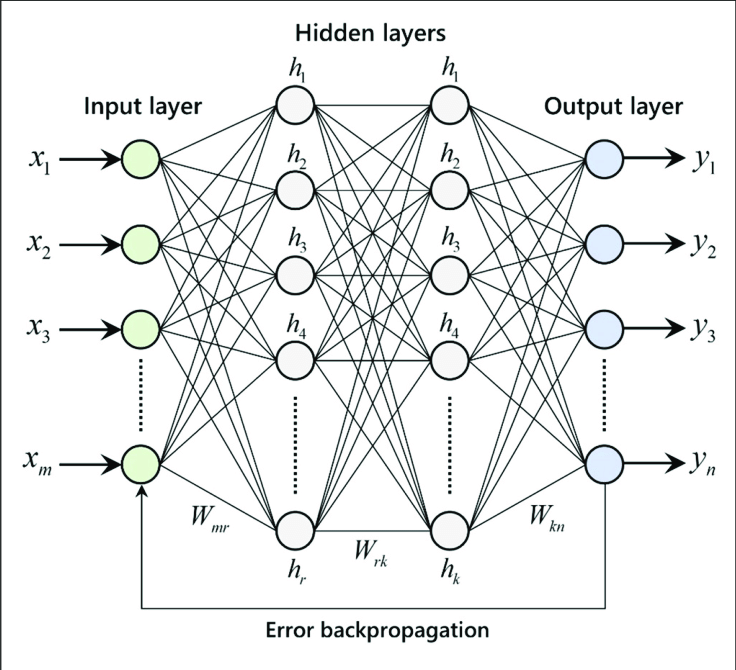

## How the Model Is Trained

How do we train the model to estimate *Q(s, a)*? Using a back propogation training algorithm!

This will be very similar to what we did in Q-Learning. Recall:
* Move 1: Q([0,0,0,0,0,0,0,0,0], 2) = 0
* Move 2: Q([0,-1,1,0,0,0,0,0,0], 4) = 0
* Move 3: Q([-1,-1,1,0,1,0,0,0,0], 7) = 0
* Move 4: Q([-1,-1,1,0,1,0,0,1,-1], 5) = (alpha)(0) + (gamma)(1) = 0.95
* Move 5: Q([-1,-1,1,0,1,-1,1,1,-1], 3) = 1

To train the neural network, we'll play one game at a time and record the states, actions, and rewards. We then follow a three step process:
1. The forward pass. 

    a. The states are taken as inputs into the neural network input layer and passed to the first hidden layer.
    
    b. Calculate the output of each node in the hidden layer using the activation function, and pass those values to the second hidden layer.
    
    c. Calculate the output of each node in the second hidden layer and pass the values to the output layer.
    
    d. Make predictions based on the output layer values.
    
2. Measure the prediction error (desired output versus model output) using a loss function (we'll use mean squared error).

3. The reverse pass.

    a. Go through each layer in reverse to measure the error contribution from each weight.
    
    b. Adjust the weights to reduce the error using an optimizing function (we'll use stochastic gradient descent).

## Putting It All Together In A Class `DQNagent`

In [ ]:
import numpy as np
import tensorflow as tf

class DQNagent:
    
    def __init__(self, state_size, action_size, iterations):
        self.gamma = 0.95                                    # discount factor
        self.state_size = state_size                         # 9 for tic-tac-toe
        self.action_size = action_size                       # 9 for tic-tac-toe
        self.iterations = iterations
        self.model = self.build_model()
        self.optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)    # learning rate (= alpha)
        self.loss_fn = tf.keras.losses.mean_squared_error

    def build_model(self):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(self.state_size**2, activation="relu", input_shape=[self.state_size]),
            tf.keras.layers.Dense(self.state_size**2, activation="relu"),
            tf.keras.layers.Dense(self.action_size)
        ])
        return model
    
    def train_model(self, state_history, action_history, next_state_history, rewards, dones):
        next_Q_values = self.model.predict(np.array(next_state_history))                         # 1. the forward pass
        max_next_Q_values = np.max(next_Q_values, axis=1)
        target_Q_values = rewards + (1 - 1*np.array(dones)) * self.gamma * max_next_Q_values
        target_Q_values = tf.reshape(target_Q_values, [len(rewards), 1])
        mask = tf.one_hot(action_history, 9)
        with tf.GradientTape() as tape:
            all_Q_values = self.model(np.array(state_history))
            Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
            loss = tf.reduce_mean(self.loss_fn(target_Q_values, Q_values))                      # 2. measure the error
        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))              # 3. the reverse pass
        
    def play_ttt(self):
        for iteration in range(self.iterations):    # outer loop to play the game a bunch of times
            state = env.reset()
            next_state = state.copy()
            done = False
            dones = []
            state_history = []
            state_history.append(state)
            action_history = []
            rewards = []
            epsilon = max(1 - iteration/(self.iterations*0.8), 0.01)
            while not done:                          # inner loop to play one game
                if random.random() < epsilon:        # epsilon-greedy policy
                    action = random.choice([i for i in range(len(state)) if state[i] == 0])
                else:
                    action = np.argmax(self.model.predict(np.array(state)[np.newaxis])[0])
                action_history.append(action)
                next_state, done, reward = env.step(state, action, 0)
                if done: 
                    state_history.append(next_state)
                    dones.append(done)
                    rewards.append(reward)
                if not done:
                    omove = random.choice([i for i in range(len(next_state)) if next_state[i] == 0])
                    next_state, done, reward = env.step(next_state, omove, 1)
                    state = next_state.copy()
                    state_history.append(next_state)
                    dones.append(done)
                    rewards.append(reward)
            next_state_history = state_history[1:len(state_history)]
            state_history = state_history[0:len(action_history)]
            self.train_model(state_history, action_history, next_state_history, rewards, dones)
        return self.model

Need a new function for the DQN agent to play against a random opponent.

In [ ]:
def dqn_v_random (model, games, render_game=False):
    results = [0 for i in range(games)]
    for i in range(games):
        board = env.reset()
        done = False
        while not done:
            xmoves = model.predict(np.array(board)[np.newaxis])[0]
            xmoves[np.where(np.array(board)!=0)[0]] = -1
            xmove = np.argmax(xmoves)
            board[xmove] = 1
            done, reward = env.game_over(board)
            if not done:
                omove = random.choice([i for i in range(len(board)) if board[i] == 0])
                board[omove] = -1
                done, reward = env.game_over(board)
        results[i] = reward
        if render_game:
            print("Action:", action, "Reward:", reward)
            render(state)
            print(" ")
    return results

## Train The Model On 1 Game



In [ ]:
tf.random.set_seed(1234)
random.seed(1234)

m1 = DQNagent(9,9,1).play_ttt()

results = dqn_v_random(m1, 1000)

print("X Won: {:.1%}\tO Won: {:.1%}\tTies: {:.1%}".format(sum(1 for i in results if i == 1)/1000, 
                                                                 sum(1 for i in results if i == -1)/1000, 
                                                                 sum(1 for i in results if i == 0)/1000))

X Won: 61.8%	O Won: 25.7%	Ties: 12.5%


## Train On 100 Games

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(1234)
random.seed(1234)

m100 = DQNagent(9,9,100).play_ttt()

results = dqn_v_random(m100, 1000)

print("X Won: {:.1%}\tO Won: {:.1%}\tTies: {:.1%}".format(sum(1 for i in results if i == 1)/1000, 
                                                                 sum(1 for i in results if i == -1)/1000, 
                                                                 sum(1 for i in results if i == 0)/1000))

X Won: 82.1%	O Won: 13.2%	Ties: 4.7%


## Train On 1,000 Games

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(1234)
random.seed(1234)

m1000 = DQNagent(9,9,1000).play_ttt()

results = dqn_v_random(m1000, 1000)

print("X Won: {:.1%}\tO Won: {:.1%}\tTies: {:.1%}".format(sum(1 for i in results if i == 1)/1000, 
                                                                 sum(1 for i in results if i == -1)/1000, 
                                                                 sum(1 for i in results if i == 0)/1000))

X Won: 92.9%	O Won: 4.0%	Ties: 3.1%


**Compare To Q-Learning Results After 500,000 Games**

X Won: 73.3%    O Won: 2.4%    Ties: 24.3%

## Training Challenges

* Training hyperparameters (alpha, gamma, epsilon, etc.)
* Neural network design (layers, nodes, dropout, recurrent, convolutional, etc.)

Catastrophic forgetting example:

<img src="https://jfking50.github.io/assets/images/mountaincar/output_16_0.png">

Training instability example:

<img src="https://jfking50.github.io/assets/images/ddqn/output_6_0.png">

# Other Applications

If you can define a problem in terms of states, actions, and rewards, then reinforcement learning may be a solution.

| Open AI Environment | State Space  | Action Space | Link |
|:---------------|:------------:|:------------:|-----|
| Cartpole       | 4 Continuous | 2 Discrete   | Not yet published |
| Mountain Car   | 2 Continuous | 3 Discrete   | https://jfking50.github.io/mountaincar/ |
| Lunar Lander   | 8 Continuous | 4 Discrete   | https://jfking50.github.io/lunar/ |
| Bipedal Walker | 24 Continuous | 4 Continuous | Not yet published |

## Combat Model Applications

What might the state, actions, and rewards be in order to:
* Train an ISR asset to collect intel at standoff?
* Train a BCT to maneuver to an objective?
* Train a Corps to defeat a threat?